In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cs109.dataloader import build_dataset
from cs109.model import KNNAnomalyDetector

%matplotlib inline

### Load the dataset 

In [2]:
msft_data = build_dataset()

In [3]:
msft_data.sample(n = 10)

,Adj Close,Diluted EPS,Gross Margin,Operating Income,Revenue,SP500,DFF,DGS10,NASDAQ100,Acquisition,...,SC 13D,SC 13D/A,SC 13G,SC 13G/A,SC TO-C,SC TO-I,SC TO-I/A,SC TO-T,SC TO-T/A,SD
2015-09-29,41.996759,-0.40,14712.0,-2053.0,22180.0,1884.09,0.13,2.05,4083.37,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-09-25,17.416407,0.01,5710.0,2751.0,6577.0,1012.27,3.11,4.72,1187.77,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-19,26.417430,0.18,4407.0,2740.0,5195.0,1252.00,4.55,4.71,2033.71,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-11-12,18.460373,0.15,3544.0,2107.0,4193.0,1117.69,5.13,4.77,1466.54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-10-05,31.170446,0.20,4672.0,2789.0,5384.0,1301.35,5.16,6.02,2471.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-02,38.446379,0.61,14568.0,6594.0,21729.0,2066.96,0.12,1.92,4316.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-04-22,17.547338,0.20,6561.0,2744.0,7835.0,911.37,1.26,4.01,1102.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-07-25,18.317077,0.14,6761.0,1540.0,8065.0,998.68,1.03,4.22,1278.31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-09-06,20.865728,0.34,8773.0,2989.0,10161.0,1233.39,3.57,4.09,1597.27,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-14,21.378145,0.45,11748.0,5173.0,14503.0,1089.63,0.18,3.28,1845.48,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def plot_results(data, r):
    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(4, 1, 1)
    ax1.plot(data[:, 0])
    ax1.set_title('Adj Close')

    ax2 = fig.add_subplot(4, 1, 2)
    ax2.plot(r[:, 0])
    ax2.set_title('Strangeness')

    ax3 = fig.add_subplot(4, 1, 3)
    ax3.plot(r[:, 1])
    ax3.set_title('P-value')

    ax3 = fig.add_subplot(4, 1, 4)
    ax3.plot(r[:, 2])
    ax3.set_title('Martingale')

In [5]:
X = msft_data.as_matrix()
X_100 = X[-100:]

In [6]:
detector = KNNAnomalyDetector()
results = []
for x in X_100:
    results.append(detector.observe(x))

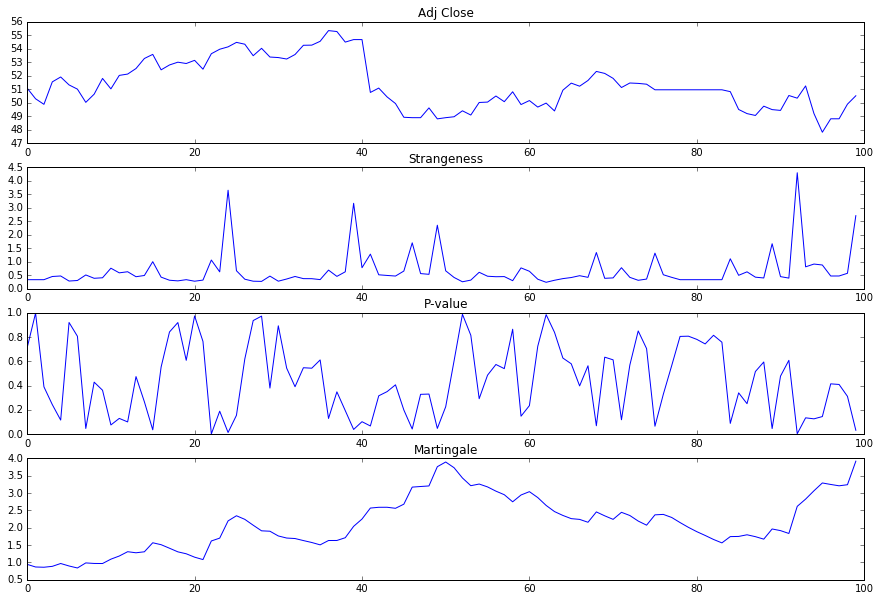

In [17]:
r = np.array(results)
plot_results(X_100, r)